In [1]:
import pandas as pd
import numpy as np
import requests

In [4]:
import os

In [8]:
os.getcwd()

'/Users/lphan'

In [11]:
os.chdir('/Users/lphan/Documents/Spotify')

In [12]:
# read your 1+ StreamingHistory files (depending on how extensive your streaming history is) into pandas dataframes
df_stream0 = pd.read_json('StreamingHistory0.json')
df_stream1 = pd.read_json('streamingHistory1.json')

# merge streaming dataframes
df_stream = pd.concat([df_stream0, df_stream1])

# create a 'UniqueID' for each song by combining the fields 'artistName' and 'trackName'
df_stream['UniqueID'] = df_stream['artistName'] + ":" + df_stream['trackName']

df_stream.describe()

,msPlayed
count,2.000000e+04
mean,1.205404e+05
std,1.177225e+05
min,0.000000e+00
25%,5.920750e+03
50%,1.327020e+05
75%,2.083010e+05
max,8.254410e+06


In [13]:
df_stream.head()

,endTime,artistName,trackName,msPlayed,UniqueID
0,2022-02-15 13:58,Wanbi Tuan Anh,Vụt Mất,17142,Wanbi Tuan Anh:Vụt Mất
1,2022-02-16 15:49,Avril Lavigne,Sk8er Boi,900,Avril Lavigne:Sk8er Boi
2,2022-02-16 15:49,David Guetta,Like I Do,0,David Guetta:Like I Do
3,2022-02-16 15:52,Sia,The Greatest,850,Sia:The Greatest
4,2022-02-16 15:52,Astrid S,Hurts So Good,960,Astrid S:Hurts So Good


In [14]:
import json

# Open the original JSON file
with open('YourLibrary.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Extract the "tracks" dictionary from the data
tracks_dict = data['tracks']

# Save the "tracks" dictionary as a new JSON file
with open('YourLibrary1.json', 'w', encoding='utf-8') as f:
    json.dump(tracks_dict, f, ensure_ascii=False, indent=4)

# read your edited Library json file into a pandas dataframe
df_library = pd.read_json('YourLibrary1.json')


In [15]:
# add UniqueID column (same as above)
df_library['UniqueID'] = df_library['artist'] + ":" + df_library['track']

# add column with track URI stripped of 'spotify:track:'
new = df_library["uri"].str.split(":", expand = True)
df_library['track_uri'] = new[2]

df_library.head()

,artist,album,track,uri,UniqueID,track_uri
0,EDEN,i think you think too much of me,XO,spotify:track:0ZAiqymvbQUZAh9y6ZT3Rm,EDEN:XO,0ZAiqymvbQUZAh9y6ZT3Rm
1,Lauv,The Other,The Other,spotify:track:3ZD3kjn80pQ9keYO8eqp9d,Lauv:The Other,3ZD3kjn80pQ9keYO8eqp9d
2,Belinda Carlisle,Greatest Vol.1 - Belinda Carlisle,Heaven Is a Place On Earth,spotify:track:37Q5anxoGWYdRsyeXkkNoI,Belinda Carlisle:Heaven Is a Place On Earth,37Q5anxoGWYdRsyeXkkNoI
3,Lauv,I met you when I was 18.,The Story Never Ends,spotify:track:3u5bTqHMM1P34ZkbwzdckV,Lauv:The Story Never Ends,3u5bTqHMM1P34ZkbwzdckV
4,Guns N' Roses,Use Your Illusion I,November Rain,spotify:track:3YRCqOhFifThpSRFJ1VWFM,Guns N' Roses:November Rain,3YRCqOhFifThpSRFJ1VWFM


In [16]:
# create final dict as a copy df_stream
combined_data = df_stream.copy()

# add column checking if streamed song is in library
# not used in this project but could be helpful for cool visualizations
combined_data['In Library'] = np.where(combined_data['UniqueID'].isin(df_library['UniqueID'].tolist()),1,0)

# left join with df_library on UniqueID to bring in album and track_uri
combined_data = pd.merge(combined_data, df_library[['album','UniqueID','track_uri']],how='left',on=['UniqueID'])

In [40]:
combined_data.sort_values('trackName')

,endTime,artistName,trackName,msPlayed,UniqueID,In Library,album,track_uri
13355,2022-10-28 01:54,Lex Fridman Podcast,"#185 – Sam Harris: Consciousness, Free Will, P...",406069,Lex Fridman Podcast:#185 – Sam Harris: Conscio...,0,NaN,NaN
13354,2022-10-28 00:44,Lex Fridman Podcast,"#185 – Sam Harris: Consciousness, Free Will, P...",8254410,Lex Fridman Podcast:#185 – Sam Harris: Conscio...,0,NaN,NaN
2933,2022-05-06 00:52,Flo D,#AiChoAi,36107,Flo D:#AiChoAi,0,NaN,NaN
3855,2022-05-17 18:51,015B,#tb,122700,015B:#tb,0,NaN,NaN
9469,2022-08-20 13:45,Anderson .Paak,'Til It's Over,85600,Anderson .Paak:'Til It's Over,0,NaN,NaN
...,...,...,...,...,...,...,...,...
9078,2022-08-15 20:48,S.H Project,"처음부터지금까지 From Beginning (From KBS Drama ""Winte...",3157,S.H Project:처음부터지금까지 From Beginning (From KBS ...,0,NaN,NaN
141,2022-02-16 21:02,2PM,하.니.뿐.,6540,2PM:하.니.뿐.,0,NaN,NaN
2332,2022-04-21 16:45,이경섭,허밍 셔플,12422,이경섭:허밍 셔플,0,NaN,NaN
12805,2022-10-17 00:54,Leessang,"헤어지지 못하는 여자, 떠나가지 못하는 남자 Can't Breakup Girl, C...",3274,"Leessang:헤어지지 못하는 여자, 떠나가지 못하는 남자 Can't Breaku...",0,NaN,NaN


In [18]:
# save your IDs from new project in Spotify Developer Dashboard
CLIENT_ID = '08923f56c32e46c1ae4b4ff05260b76f'
CLIENT_SECRET = '226fd5b07d874db0a61e720c750d646c'

In [19]:
# generate access token

# authentication URL
AUTH_URL = 'https://accounts.spotify.com/api/token'

# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

In [20]:
# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

# used for authenticating all API calls
headers = {'Authorization': 'Bearer {token}'.format(token=access_token)}

In [21]:
# base URL of all Spotify API endpoints
BASE_URL = 'https://api.spotify.com/v1/'

In [22]:
# create blank dictionary to store track URI, artist URI, and genres
dict_genre = {}


In [23]:
# convert track_uri column to an iterable list
track_uris = df_library['track_uri'].to_list()


In [26]:
# loop through track URIs and pull artist URI using the API,
# then use artist URI to pull genres associated with that artist
# store all these in a dictionary
for t_uri in track_uris:
      
    dict_genre[t_uri] = {'artist_uri': "", "genres":[]}
   
    r = requests.get(BASE_URL + 'tracks/' + t_uri, headers=headers)
    r = r.json()
    a_uri = r['artists'][0]['uri'].split(':')[2]
    dict_genre[t_uri]['artist_uri'] = a_uri
   
    s = requests.get(BASE_URL + 'artists/' + a_uri, headers=headers)
    s = s.json()
    dict_genre[t_uri]['genres'] = s['genres']
   

In [27]:
# convert dictionary into dataframe with track_uri as the first column
df_genre = pd.DataFrame.from_dict(dict_genre, orient='index')
df_genre.insert(0, 'track_uri', df_genre.index)
df_genre.reset_index(inplace=True, drop=True)

df_genre.head()

df_genre_expanded = df_genre.explode('genres')
df_genre_expanded.head()

,track_uri,artist_uri,genres
0,0ZAiqymvbQUZAh9y6ZT3Rm,1t20wYnTiAT0Bs7H1hv9Wt,indie poptimism
1,3ZD3kjn80pQ9keYO8eqp9d,5JZ7CnR6gTvEMKX4g70Amv,pop
2,37Q5anxoGWYdRsyeXkkNoI,7xkAwz0bQTGDSbkofyQt3U,new romantic
2,37Q5anxoGWYdRsyeXkkNoI,7xkAwz0bQTGDSbkofyQt3U,new wave pop
2,37Q5anxoGWYdRsyeXkkNoI,7xkAwz0bQTGDSbkofyQt3U,soft rock


In [28]:
combined_data2 = combined_data[combined_data['track_uri'].notna()]
combined_data2 = combined_data2.iloc[:, 1:].drop_duplicates()
# df_tableau2
top_tracks = combined_data2.sort_values('msPlayed', ascending=False).head(500)
top_tracks

,artistName,trackName,msPlayed,UniqueID,In Library,album,track_uri
15277,RAYE,Escapism. - Sped Up,667871,RAYE:Escapism. - Sped Up,1,Escapism.,4rPJSqrov3zqGwXlemLBMw
10576,Thùy Chi,Phiến Lá Tĩnh Lặng,548959,Thùy Chi:Phiến Lá Tĩnh Lặng,1,Phiến Lá Tĩnh Lặng,69EwGs863aPS8olgCWtZ8J
19661,DJ Khaled,"GOD DID (feat. Rick Ross, Lil Wayne, Jay-Z, Jo...",501648,"DJ Khaled:GOD DID (feat. Rick Ross, Lil Wayne,...",1,GOD DID,2sOj9vyd6yiss9W1IK6chU
1911,Ngô Anh Đạt,Cô Ấy Nói,469727,Ngô Anh Đạt:Cô Ấy Nói,1,Cô Ấy Nói,0F2gUQwJsy8iCfYv3uDgCp
15725,Travis Scott,3500 (feat. Future & 2 Chainz),461840,Travis Scott:3500 (feat. Future & 2 Chainz),1,Rodeo (Expanded Edition),1SGt65i9AnXYdDQt1AtDRH
...,...,...,...,...,...,...,...
11085,Gesaffelstein,Lost in the Fire (feat. The Weeknd),202093,Gesaffelstein:Lost in the Fire (feat. The Weeknd),1,Hyperion,2vXKRlJBXyOcvZYTdNeckS
191,SOOBIN,Đi Để Trở Về,202084,SOOBIN:Đi Để Trở Về,1,Đi Để Trở Về,5oDMahI0iti1HG9RBzzlHS
7439,MONSTAR,Badadu,201969,MONSTAR:Badadu,1,Badadu,4MdDjLdv6rLf53WltCDBhW
4914,Young T & Bugsey,Don't Rush (feat. DaBaby),201960,Young T & Bugsey:Don't Rush (feat. DaBaby),1,Don't Rush (feat. DaBaby),3AMxuq6id3YGB57eWeheZQ


In [29]:
# create blank dictionary to store audio features
feature_dict = {}

# convert track_uri column to an iterable list
track_uris = top_tracks['track_uri'].to_list()

# loop through track URIs and pull audio features using the API,
# store all these in a dictionary
for t_uri in track_uris:
    
    feature_dict[t_uri] = {'popularity': 0,
                           'danceability': 0,
                           'energy': 0,
                           'loudness':0,
                           'valence':0,
#                            'acousticness':0,
                           'speechiness': 0,
                           'instrumentalness': 0,
                           'tempo': 0}
#     audio_features_list =['artist', 'album', 'track_name', 'track_id', 'danceability', 'energy', 'key', 'loudness', 'mode', 
#                               'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'acousticness']
    r = requests.get(BASE_URL + 'tracks/' + t_uri, headers=headers)
    r = r.json()
    feature_dict[t_uri]['popularity'] = r['popularity']
    
    s = requests.get(BASE_URL + 'audio-features/' + t_uri, headers=headers)
    s = s.json()
    feature_dict[t_uri]['danceability'] = s['danceability']
    feature_dict[t_uri]['energy'] = s['energy']
    feature_dict[t_uri]['loudness'] = s['loudness']
    feature_dict[t_uri]['valence'] = s['valence']
#     feature_dict[t_uri]['acousticness'] = s['acousticness']
    feature_dict[t_uri]['speechiness'] = s['speechiness']
    feature_dict[t_uri]['instrumentalness'] = s['instrumentalness']
    feature_dict[t_uri]['tempo'] = s['tempo']

In [30]:
# convert dictionary into dataframe with track_uri as the first column
df_features = pd.DataFrame.from_dict(feature_dict, orient='index')
df_features.insert(0, 'track_uri', df_features.index)
df_features.reset_index(inplace=True, drop=True)

df_features.head()

,track_uri,popularity,danceability,energy,loudness,valence,speechiness,instrumentalness,tempo
0,4rPJSqrov3zqGwXlemLBMw,85,0.435,0.768,-5.352,0.378,0.2010,0.000231,107.588
1,69EwGs863aPS8olgCWtZ8J,41,0.632,0.349,-11.491,0.299,0.0309,0.000000,148.009
2,2sOj9vyd6yiss9W1IK6chU,66,0.420,0.725,-4.262,0.186,0.2230,0.000000,77.941
3,0F2gUQwJsy8iCfYv3uDgCp,0,0.600,0.326,-9.091,0.214,0.0281,0.000000,84.996
4,1SGt65i9AnXYdDQt1AtDRH,67,0.773,0.595,-6.062,0.338,0.1610,0.000002,123.968


In [31]:
len(df_features)

337

In [32]:
# Store username and playlist
username = 'Spotify'
top_pop = 'https://open.spotify.com/playlist/37i9dQZF1DXcBWIGoYBM5M'
new_music_fri ='https://open.spotify.com/playlist/37i9dQZF1DX4JAvHpjipBk'
chillinhboston = 'https://open.spotify.com/playlist/2zcNxFb2CqAXQJx13b2lhH'
chillinhvinhna ='https://open.spotify.com/playlist/6SQJlAQfgof3rr7up2VAoh'

In [33]:
## This is to pull playlist for cluster later
#!pip install spotipy --upgrade -q
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)
def call_playlist(creator_id, playlist_url, limit, offset):
    # NOTE: use playlist_url instead of playlist_id. playlist_id doesn't accept limit and offset parameters for some reason?
    
    # create an empty list and an empty df
    playlist_features_list = ['artist', 'album', 'track_name', 'track_id', 'danceability', 'energy', 'key', 'loudness', 'mode', 
                              'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'acousticness']
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # loop through the specified playlist and extract wanted features
    playlist = sp.user_playlist_tracks(creator_id, playlist_url, limit=limit, offset=offset)["items"]
    for track in playlist:

        # create empty dict
        playlist_features = {}

        # get metadata
        playlist_features['artist'] = track['track']['album']['artists'][0]['name']
        playlist_features['album'] = track['track']['album']['name']
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        playlist_features["explicit"] = track["track"]["explicit"]
        playlist_features["popularity"] = track["track"]["popularity"]
        playlist_features["album_release_date"] = track["track"]["album"]["release_date"]
        playlist_features["duration_ms"] = track["track"]["duration_ms"]
        playlist_features['added_by'] = track["added_by"]["id"]
        playlist_features['added_at'] = track["added_at"]
        
        # get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # concat dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)

    # return df
    return playlist_df
     

In [34]:
# cant figure out a loop yet but this is to get every 100 songs in the playlist
first100 = call_playlist(username, top_pop, 100, 0)

# songs 101-200 requires an offset of 100
second100 = call_playlist(username, top_pop, 100, 100)

# songs 201-270 requires an offset of 200
third100 = call_playlist(username, top_pop, 100, 200)

In [36]:
top_pop = pd.concat([first100, second100, third100], ignore_index = True)
# chillin_boston = pd.concat([first100, second100, third100], ignore_index = True)
# chillin_boston.head()
top_pop.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,duration_ms,time_signature,acousticness,explicit,popularity,album_release_date,added_by,added_at
0,Post Malone,Chemical,Chemical,5w40ZYhbBMAlHYNDaVJIUu,0.498,0.897,2,-4.907,1,0.0450,...,0.373,169.902,184013,4,0.00136,True,74.0,2023-04-14,,2023-04-14T04:01:18Z
1,PinkPantheress,Boy's a liar Pt. 2,Boy's a liar Pt. 2,6AQbmUe0Qwf5PZnt4HmTXv,0.696,0.809,5,-8.254,1,0.0500,...,0.857,132.962,131013,4,0.25200,False,98.0,2023-02-03,,2023-04-14T04:01:18Z
2,Rema,Calm Down (with Selena Gomez),Calm Down (with Selena Gomez),0WtM2NBVQNNJLh6scP13H8,0.801,0.806,11,-5.206,1,0.0381,...,0.802,106.999,239318,4,0.38200,False,96.0,2022-08-25,,2023-04-14T04:01:18Z
3,SZA,Kill Bill (feat. Doja Cat),Kill Bill (feat. Doja Cat),0CrcwVLUe8wzLUIXgjXVZJ,0.629,0.744,5,-6.124,0,0.0409,...,0.451,89.021,175837,4,0.07690,False,72.0,2023-04-14,,2023-04-14T04:01:18Z
4,Miley Cyrus,Flowers,Flowers,0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,1,0.0668,...,0.646,117.999,200455,4,0.06320,False,100.0,2023-01-13,,2023-04-14T04:01:18Z


### Create visualizations

In [37]:
# list all the important files

In [42]:
# create vis for top artists in the last 3 months
combined_data

,endTime,artistName,trackName,msPlayed,UniqueID,In Library,album,track_uri
0,2022-02-15 13:58,Wanbi Tuan Anh,Vụt Mất,17142,Wanbi Tuan Anh:Vụt Mất,0,NaN,NaN
1,2022-02-16 15:49,Avril Lavigne,Sk8er Boi,900,Avril Lavigne:Sk8er Boi,1,Let Go,00Mb3DuaIH1kjrwOku9CGU
2,2022-02-16 15:49,David Guetta,Like I Do,0,David Guetta:Like I Do,1,Like I Do,6RnkFd8Fqqgk1Uni8RgqCQ
3,2022-02-16 15:52,Sia,The Greatest,850,Sia:The Greatest,1,This Is Acting (Deluxe Version),6bLopGnirdrilrpdVB6Um1
4,2022-02-16 15:52,Astrid S,Hurts So Good,960,Astrid S:Hurts So Good,1,Hurts So Good,3EVBx6WnnMj0qGpcPHjECA
...,...,...,...,...,...,...,...,...
19999,2023-02-12 19:25,Lady Gaga,Just Dance,2530,Lady Gaga:Just Dance,0,NaN,NaN
20000,2023-02-12 19:28,Shab,Dolce Vita,5997,Shab:Dolce Vita,0,NaN,NaN
20001,2023-02-12 19:28,Britney Spears,Toxic,198813,Britney Spears:Toxic,0,NaN,NaN
20002,2023-02-12 19:33,Black Eyed Peas,Boom Boom Pow,3134,Black Eyed Peas:Boom Boom Pow,0,NaN,NaN


In [129]:
import datetime 
tod = max(combined_data['endTime'])
date_time_obj = datetime.combined_data['endTime'](date_time_str, '%d/%m/%y

'2023-02-12 19:33'

In [135]:
combined_data['endTime']=pd.to_datetime(combined_data['endTime'])

In [146]:
combined_data= combined_data.iloc[:,:-1]

In [166]:
max_date = combined_data['endTime'].max()
date_range = max_date - datetime.timedelta(days=90)

# filter the DataFrame based on the date range
recent_tracks = combined_data[combined_data['endTime'] >= date_range]
recent_tracks

,endTime,artistName,trackName,msPlayed,UniqueID,In Library,album,track_uri
14585,2022-11-15 02:07:00,Bill Charlap Trio,Day Dream,228058,Bill Charlap Trio:Day Dream,0,NaN,NaN
14586,2022-11-15 02:11:00,Herman Fred Trio,Small Steps,212363,Herman Fred Trio:Small Steps,0,NaN,NaN
14587,2022-11-15 02:15:00,Wildflower Trio,The Wind,237679,Wildflower Trio:The Wind,0,NaN,NaN
14588,2022-11-15 02:16:00,The Collective,All My Love,19806,The Collective:All My Love,0,NaN,NaN
14589,2022-11-15 02:16:00,Gene Hart Trio,Pensativa,80016,Gene Hart Trio:Pensativa,0,NaN,NaN
...,...,...,...,...,...,...,...,...
19999,2023-02-12 19:25:00,Lady Gaga,Just Dance,2530,Lady Gaga:Just Dance,0,NaN,NaN
20000,2023-02-12 19:28:00,Shab,Dolce Vita,5997,Shab:Dolce Vita,0,NaN,NaN
20001,2023-02-12 19:28:00,Britney Spears,Toxic,198813,Britney Spears:Toxic,0,NaN,NaN
20002,2023-02-12 19:33:00,Black Eyed Peas,Boom Boom Pow,3134,Black Eyed Peas:Boom Boom Pow,0,NaN,NaN


In [173]:
track_list_ms = recent_tracks.groupby(['UniqueID'],as_index=False).sum('msPlayed').sort_values('msPlayed',ascending = False)
track_list_ms

,UniqueID,msPlayed,In Library
1467,RAYE:Escapism. - Sped Up,14366878,72
1149,Metro Boomin:Creepin' (with The Weeknd & 21 Sa...,9913718,56
1766,The Weeknd:Die For You,8877031,46
1654,Stacey Ryan:Fall In Love Alone - Sped Up Version,8360346,60
1975,ZICO:Any song,6886006,47
...,...,...,...
248,Bruno Major:Regent's Park,0,0
201,Big Sean:Bounce Back,0,1
187,Benson Boone:Before You,0,0
1936,Wren Evans:Trao,0,0


In [174]:
track_list_ms = pd.merge(track_list_ms, recent_tracks[['artistName','trackName','album','UniqueID','track_uri']].drop_duplicates(),how='inner',on=['UniqueID'])

In [336]:
track_list_ms['minutes'] = round(track_list_ms['msPlayed']/60000,1)
track_list_ms['hours'] = round(track_list_ms['minutes']/60,1)

In [337]:
### most played songs
top_10_tracks = track_list_ms.head(10)
top_10_tracks[['trackName','artistName','msPlayed','minutes','hours']]

,trackName,artistName,msPlayed,minutes,hours
0,Escapism. - Sped Up,RAYE,14366878,239.4,4.0
1,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,9913718,165.2,2.8
2,Die For You,The Weeknd,8877031,148.0,2.5
3,Fall In Love Alone - Sped Up Version,Stacey Ryan,8360346,139.3,2.3
4,Any song,ZICO,6886006,114.8,1.9
5,Kill Bill,SZA,6807853,113.5,1.9
6,I Was Never There,The Weeknd,6545846,109.1,1.8
7,Collide (feat. Tyga),Justine Skye,6260562,104.3,1.7
8,Very Few Friends,Saint Levant,5626139,93.8,1.6
9,Đi Cùng Em,Hà Tròn,4893463,81.6,1.4


In [345]:
track_chart = px.bar(top_10_tracks.head(10), x='minutes', y='trackName', orientation='h', hover_data= ['artistName','hours'],
             labels={'num_plays': 'In Minutes', 'trackName': 'Song Name'})


In [346]:

track_chart.update_layout(title={
        'text': "Your Top Recent Tracks",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, font_size=16, 
                  xaxis_title='Total Minutes Played', yaxis_title='Song Name',
                  plot_bgcolor='rgb(255, 255, 255)', margin=dict(l=150, r=50, t=50, b=50))


In [195]:
artist_list_dup = recent_tracks['artistName']

In [196]:
artist_list_dup

0          *NSYNC
1       03 Greedo
2            10cm
3       14 Casper
4          1nonly
          ...    
2109          演奏曲
2110          詹宇豪
2111          陳承麒
2112          黃俊郎
2113         달콤한꿈
Name: artistName, Length: 2114, dtype: object

In [189]:
##pip install wordcloud  
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud

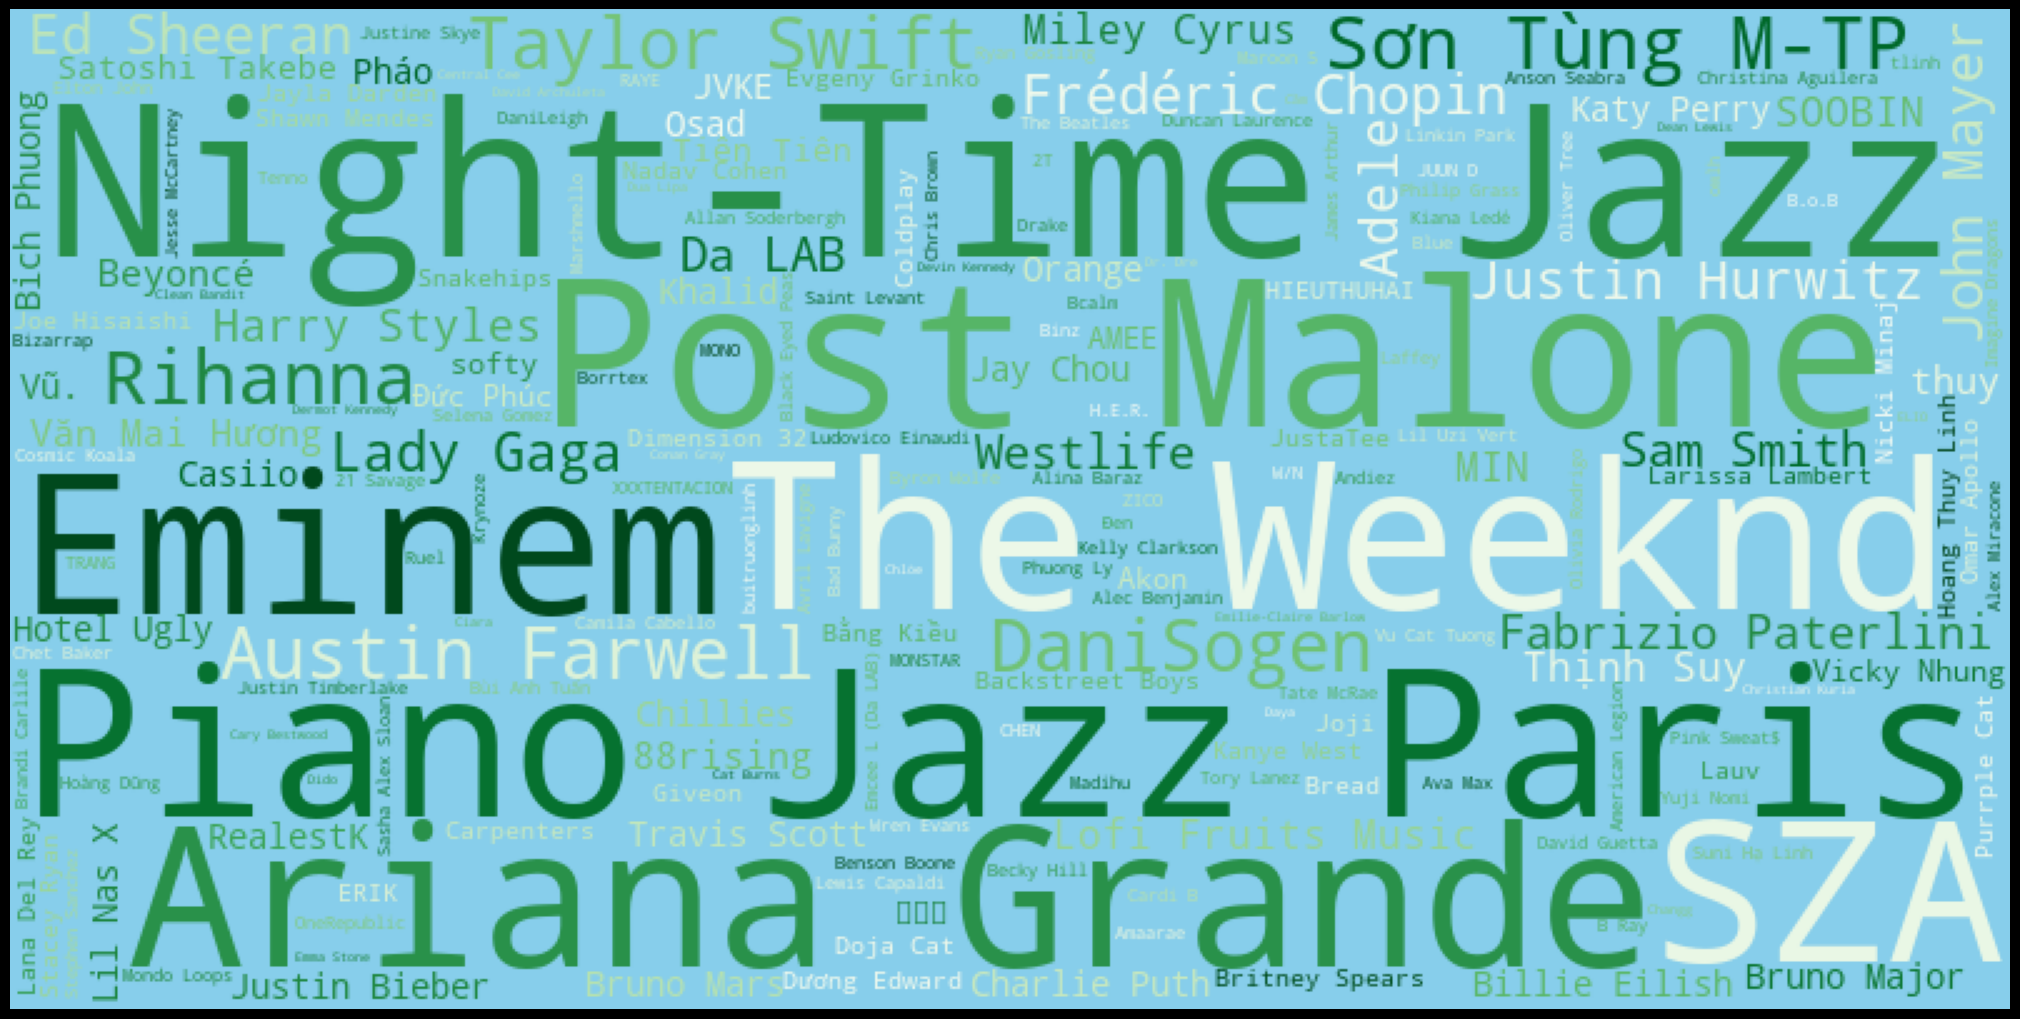

In [248]:
### static chart
import matplotlib.pyplot as plt
# group the DataFrame by the 'fruit' column and count the number of occurrences of each fruit
freq = recent_tracks.groupby('artistName').size().reset_index(name='count')

# convert the 'freq' DataFrame to a dictionary to use as input to the WordCloud object
freq_dict = dict(zip(freq['artistName'], freq['count']))

# create a WordCloud object with relative scaling set to 0
wordcloud = WordCloud(width=800, height=400, relative_scaling=0,colormap='Greens',background_color="skyblue").generate_from_frequencies(freq_dict)
# Open a plot of the generated image.

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [280]:
# group the DataFrame by the 'fruit' column and count the number of occurrences of each fruit
freq = recent_tracks.groupby('artistName').size().reset_index(name='count')

# convert the 'freq' DataFrame to a dictionary to use as input to the WordCloud object
freq_dict = dict(zip(freq['artistName'], freq['count']))

# create a WordCloud object with relative scaling set to 0
wordcloud = WordCloud(width=1000, height=500, relative_scaling=0,colormap='Greens',background_color="skyblue").generate_from_frequencies(freq_dict)
# convert the WordCloud object into an image that can be plotted in Plotly
img = wordcloud.to_image()

# create a Plotly figure and add the word cloud image to it
artist_chart = px.imshow(img)
artist_chart.update_layout(
    title={
        'text': "Your Top Recent Artists",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        font_size=16, 
    margin={'l': 0, 'r': 0, 'b': 0, 't': 50},
    xaxis=dict(visible=False),
    yaxis = dict(visible=False))

# show the Plotly figure
artist_chart.show()